In [175]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override() 
import matplotlib as plt 
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [28]:
years = input("Years of Investment:")
sv = input("Satring portfolio Value in USD:")
riskb = input("Risk Tolerance Level (1 to 5): ")

Years of Investment:100
Satring portfolio Value in USD:200000
Risk Tolerance Level (1 to 5): 1


In [29]:
tick = ['VYM', 'XLF', 'VTV', 'USMV', 'XLE', 'BND', 'AGG', 'VMBS', 'IGSB', 'SCHP','SGOL','IAU', 'FREL', 'MORT']
price_data = pdr.get_data_yahoo(tick, start='2017-01-01', end=date.today())['Adj Close']

[*********************100%***********************]  14 of 14 completed


In [30]:
price_data.head()

,AGG,BND,FREL,IAU,IGSB,MORT,SCHP,SGOL,USMV,VMBS,VTV,VYM,XLE,XLF
Date,,,,,,,,,,,,,,
2017-01-03,93.365082,68.710770,19.040112,22.32,45.728649,13.075974,45.613701,11.261,40.636940,45.756210,80.101883,62.992619,57.589218,20.873672
2017-01-04,93.390938,68.761803,19.329203,22.42,45.763546,13.199660,45.663490,11.305,40.825161,45.738728,80.538208,63.174580,57.468262,21.042370
2017-01-05,93.779373,69.110458,19.410183,22.76,45.789719,13.229112,45.821148,11.477,40.869972,45.957253,80.238770,63.033993,57.324619,20.829279
2017-01-06,93.468651,68.838333,19.338917,22.60,45.728649,13.211443,45.663490,11.399,40.923752,45.861107,80.315788,63.050507,57.377544,20.900311
2017-01-09,93.624008,69.008392,19.207737,22.76,45.759171,13.146652,45.746471,11.488,40.726562,45.904800,79.879478,62.653568,56.545868,20.758253


In [31]:
log_ret = np.log(price_data/price_data.shift(1))
log_ret

,AGG,BND,FREL,IAU,IGSB,MORT,SCHP,SGOL,USMV,VMBS,VTV,VYM,XLE,XLF
Date,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.000277,0.000742,0.015069,0.004470,0.000763,0.009415,0.001091,0.003900,0.004621,-0.000382,0.005432,0.002884,-0.002103,0.008049
2017-01-05,0.004151,0.005058,0.004181,0.015051,0.000572,0.002229,0.003447,0.015100,0.001097,0.004766,-0.003725,-0.002228,-0.002503,-0.010178
2017-01-06,-0.003319,-0.003945,-0.003678,-0.007055,-0.001335,-0.001336,-0.003447,-0.006819,0.001315,-0.002094,0.000959,0.000262,0.000923,0.003404
2017-01-09,0.001661,0.002467,-0.006806,0.007055,0.000667,-0.004916,0.001816,0.007777,-0.004830,0.000952,-0.005447,-0.006315,-0.014601,-0.006820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,0.007920,0.007950,0.013083,0.023137,0.001401,-0.007214,0.005693,0.023180,0.003466,0.009111,-0.008413,-0.009628,-0.020541,-0.040278
2023-03-14,-0.005884,-0.006300,0.009701,-0.006081,-0.000800,0.012590,-0.003032,-0.006019,0.009328,-0.005630,0.011817,0.011562,0.009834,0.020032
2023-03-15,0.009921,0.010251,-0.001208,0.007458,0.002798,-0.035474,0.011323,0.007655,-0.001429,0.009079,-0.013089,-0.012442,-0.055196,-0.027012


In [81]:
correlation_matrix = price_data.corr(method='pearson')
correlation_matrix

,AGG,BND,FREL,IAU,IGSB,MORT,SCHP,SGOL,USMV,VMBS,VTV,VYM,XLE,XLF
AGG,1.000000,0.999716,0.567330,0.760629,0.933223,-0.073691,0.815336,0.758203,0.622794,0.974304,0.401266,0.375511,-0.528205,0.372250
BND,0.999716,1.000000,0.571931,0.765564,0.935830,-0.075390,0.819616,0.763136,0.630243,0.971918,0.409474,0.383790,-0.520900,0.379892
FREL,0.567330,0.571931,1.000000,0.711709,0.751498,0.305156,0.856297,0.712220,0.927070,0.456551,0.909079,0.899671,0.293866,0.914533
IAU,0.760629,0.765564,0.711709,1.000000,0.890254,-0.321224,0.931468,0.999973,0.860562,0.613193,0.756927,0.747414,0.034115,0.658350
IGSB,0.933223,0.935830,0.751498,0.890254,1.000000,-0.057987,0.933528,0.888856,0.836377,0.848015,0.674273,0.653847,-0.223416,0.623645
MORT,-0.073691,-0.075390,0.305156,-0.321224,-0.057987,1.000000,-0.101396,-0.321956,0.036307,0.013318,0.099801,0.091167,0.090818,0.254731
SCHP,0.815336,0.819616,0.856297,0.931468,0.933528,-0.101396,1.000000,0.931365,0.912188,0.691355,0.815500,0.799788,0.003699,0.771049
SGOL,0.758203,0.763136,0.712220,0.999973,0.888856,-0.321956,0.931365,1.000000,0.860934,0.610203,0.758407,0.748999,0.037607,0.659838
USMV,0.622794,0.630243,0.927070,0.860562,0.836377,0.036307,0.912188,0.860934,1.000000,0.473229,0.952600,0.945948,0.300617,0.895443
VMBS,0.974304,0.971918,0.456551,0.613193,0.848015,0.013318,0.691355,0.610203,0.473229,1.000000,0.241796,0.213328,-0.657038,0.238502


Correlation between Stocks in portfolio


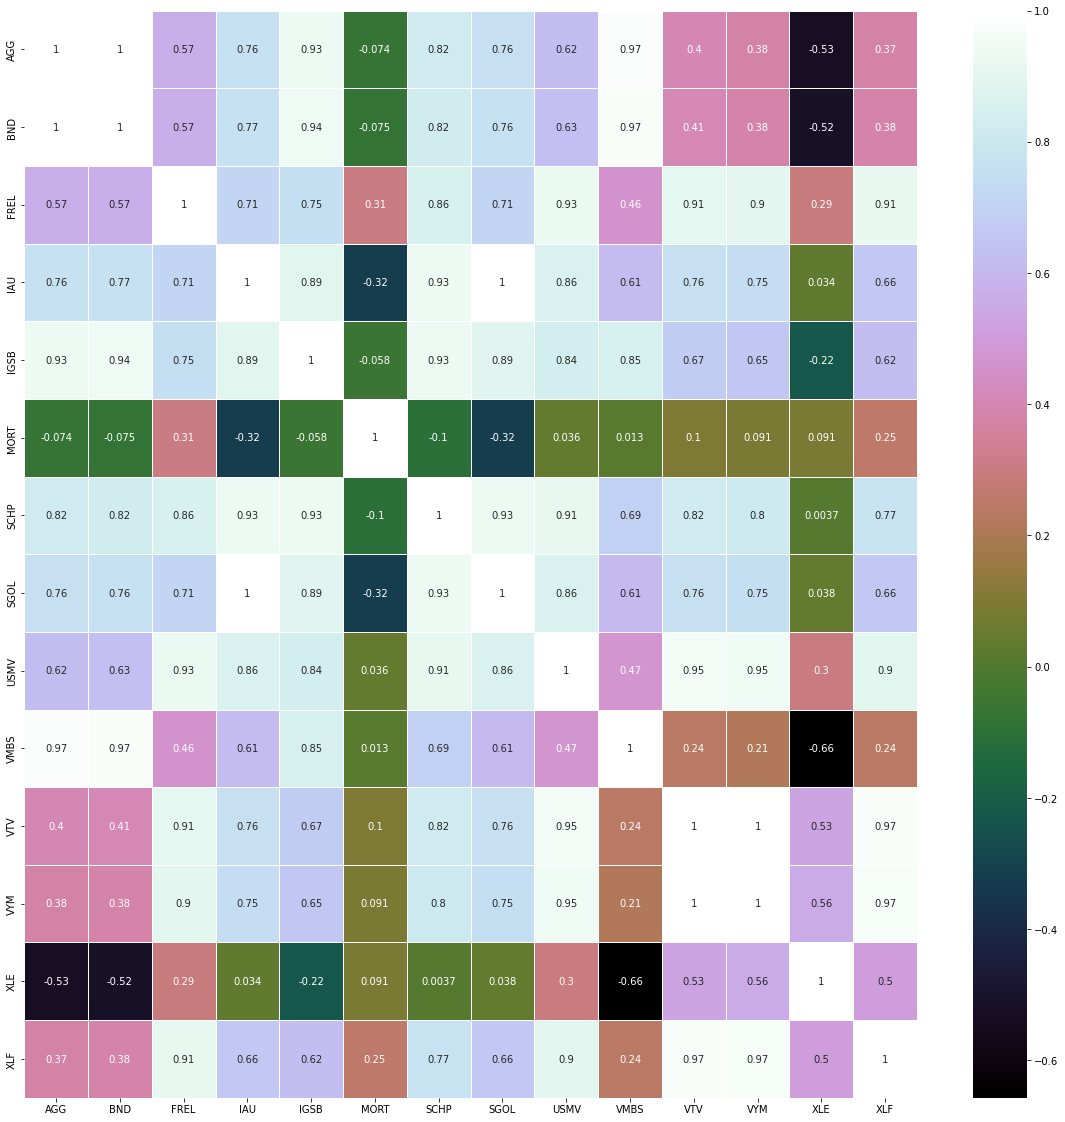

In [88]:
fig1 = pyplot.figure(figsize=(20,20))
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='cubehelix', annot=True, linewidth=0.5)
print('Correlation between Stocks in portfolio')
pyplot.show(fig1)

<Axes: title={'center': 'Correlation Matrix'}>

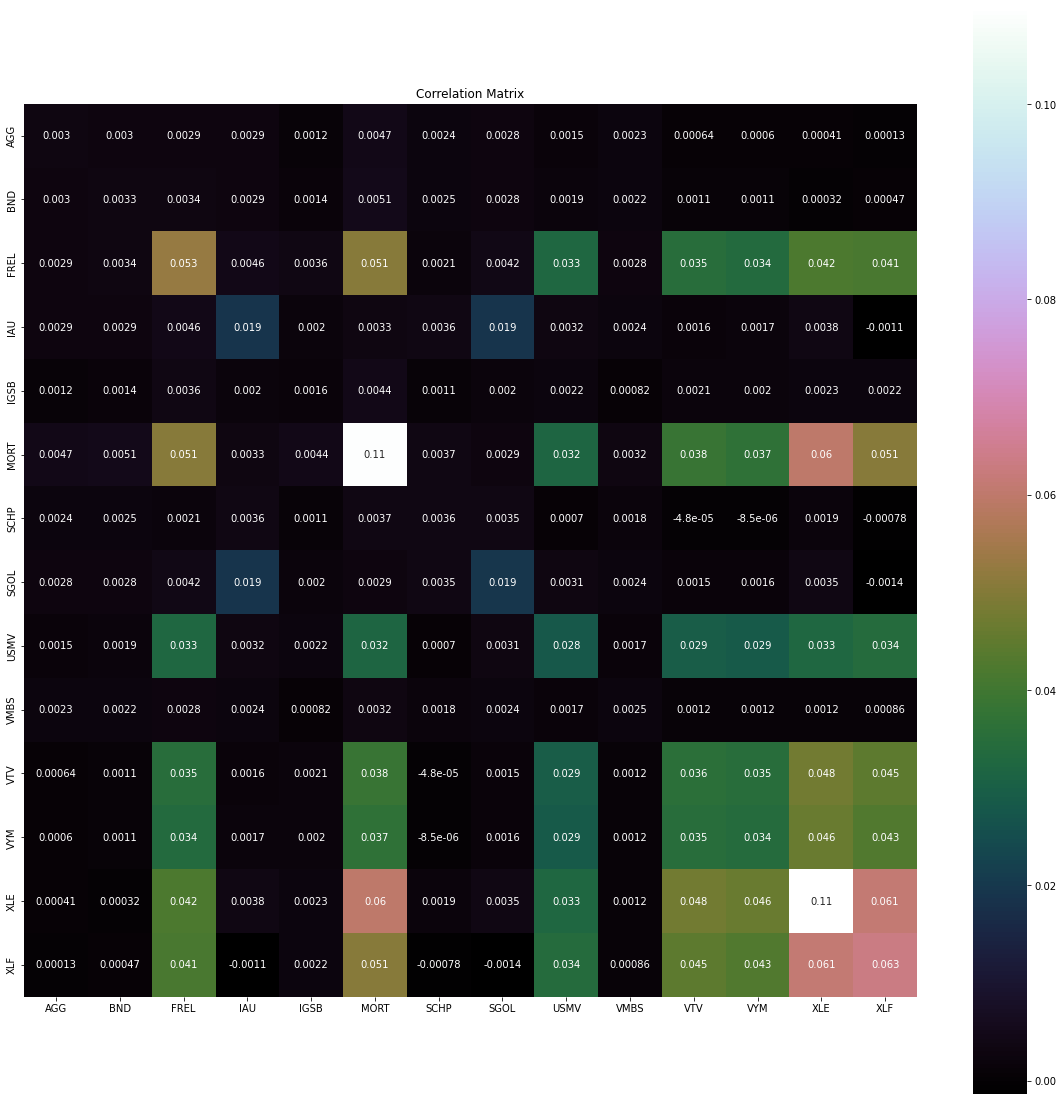

In [32]:
cov_mat = log_ret.cov() * 252
from matplotlib import pyplot
import seaborn as sns
pyplot.figure(figsize=(20,20))
pyplot.title('Correlation Matrix')
sns.heatmap(cov_mat, vmax=0.11, square=True,annot=True,cmap='cubehelix')

In [33]:
# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [34]:
for i in range(num_port):
    wts = np.random.uniform(size = len(price_data.columns))
    wts = wts/np.sum(wts)
  
  # saving weights in the array
  
    all_wts[i,:] = wts
  
  # Portfolio Returns
  
    port_ret = np.sum(log_ret.mean() * wts)
    port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
    port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
    port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
    port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
    sr = port_ret / port_sd
    sharpe_ratio[i] = sr

In [35]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(price_data)
S = risk_models.sample_cov(price_data)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 8.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.61


(0.0891643292685837, 0.11294309196202373, 0.6123821126823735)

In [36]:
ef.clean_weights()

OrderedDict([('AGG', 0.0),
             ('BND', 0.0),
             ('FREL', 0.0),
             ('IAU', 0.30703),
             ('IGSB', 0.0),
             ('MORT', 0.0),
             ('SCHP', 0.0),
             ('SGOL', 0.27995),
             ('USMV', 0.41302),
             ('VMBS', 0.0),
             ('VTV', 0.0),
             ('VYM', 0.0),
             ('XLE', 0.0),
             ('XLF', 0.0)])

In [37]:
class Portfolio:
    def __init__(self, riskBucket=1, expectedReturn=0, expectedRisk=0):
        self.riskBucket = riskBucket
        self.allocations = []
        self.expectedReturn = expectedReturn
        self.expectedRisk = expectedRisk

    def getDailyPrices(self, period):
        tickerStringList = ""
        for allocation in self.allocations:
            tickerStringList = tickerStringList + str(allocation.ticker) + " "
        data = yf.download(tickerStringList, group_by="Ticker", period=period)
        data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
        data = data.dropna()
        data.columns = data.columns.droplevel(1)
        return data

    def printPortfolio(self):
        print("Risk Bucket: " + str(self.riskBucket))
        print("Expected Return: " + str(self.expectedReturn))
        print("Expected Risk: " + str(self.expectedRisk))
        print("Allocations: ")
        for allocation in self.allocations:
            print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

In [38]:
mu = expected_returns.mean_historical_return(price_data)
S = risk_models.sample_cov(price_data)

ef = EfficientFrontier(mu, S)
ef.efficient_return(0.02)
portfolioWeights1 = ef.clean_weights()
print(portfolioWeights1)
ef.efficient_return(0.03)
portfolioWeights2 = ef.clean_weights()
print(portfolioWeights2)
ef.efficient_return(0.04)
portfolioWeights3 = ef.clean_weights()
print(portfolioWeights3)
ef.efficient_return(0.06)
portfolioWeights4 = ef.clean_weights()
print(portfolioWeights4)
ef.efficient_return(0.07)
portfolioWeights5 = ef.clean_weights()
print(portfolioWeights5)

OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.0), ('IGSB', 0.65817), ('MORT', 0.0), ('SCHP', 0.15141), ('SGOL', 0.03228), ('USMV', 0.01164), ('VMBS', 0.12008), ('VTV', 0.0), ('VYM', 0.02642), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.0), ('IGSB', 0.60098), ('MORT', 0.0), ('SCHP', 0.22473), ('SGOL', 0.08928), ('USMV', 0.07819), ('VMBS', 0.0), ('VTV', 0.00684), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.04341), ('IGSB', 0.44878), ('MORT', 0.0), ('SCHP', 0.24518), ('SGOL', 0.12111), ('USMV', 0.14151), ('VMBS', 0.0), ('VTV', 0.0), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.12785), ('IGSB', 0.14125), ('MORT', 0.0), ('SCHP', 0.28828), ('SGOL', 0.18863), ('USMV', 0.25399), ('VMBS', 0.0), ('VTV', 0.0), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL'

In [39]:
class Allocation:
    def __init__(self, ticker, percentage):
        self.ticker = ticker
        self.percentage = percentage

In [51]:
newPortfolio = Portfolio("Aggressive Growth", 5)

for key, value in portfolioWeights5.items():
    newAllocation = Allocation(key, value)
    newPortfolio.allocations.append(newAllocation)

newPortfolio.printPortfolio()

Risk Bucket: Aggressive Growth
Expected Return: 5
Expected Risk: 0
Allocations: 
Ticker: AGG, Percentage: 0.0
Ticker: BND, Percentage: 0.0
Ticker: FREL, Percentage: 0.0
Ticker: IAU, Percentage: 0.17241
Ticker: IGSB, Percentage: 0.0
Ticker: MORT, Percentage: 0.0
Ticker: SCHP, Percentage: 0.29552
Ticker: SGOL, Percentage: 0.22212
Ticker: USMV, Percentage: 0.30996
Ticker: VMBS, Percentage: 0.0
Ticker: VTV, Percentage: 0.0
Ticker: VYM, Percentage: 0.0
Ticker: XLE, Percentage: 0.0
Ticker: XLF, Percentage: 0.0


In [49]:
def getPortfolio(riskb: int) -> Portfolio:

    mu = expected_returns.mean_historical_return(price_data)
    S = risk_models.sample_cov(price_data)

    ef = EfficientFrontier(mu, S)
    expectedReturn = 0
    portfolioName = ""

    if(riskb == 1):
        expectedReturn = 0.02
        portfolioName = "Conservative"
    elif(riskb == 2):
        expectedReturn = 0.04
        portfolioName = "Moderate"
    elif(riskb == 3):
        expectedReturn = 0.06
        portfolioName = "Moderate Growth"
    elif(riskb == 4):
        expectedReturn = 0.08
        portfolioName = "Growth"
    elif(riskb == 5):
        expectedReturn = 0.12
        portfolioName = "Aggressive Growth"
    else:
        return -1

    ef.efficient_return(expectedReturn)
    expectedRisk = ef.portfolio_performance()[1]
    portfolioWeights = ef.clean_weights()

    newPortfolio = Portfolio(portfolioName, riskBucket)
    newPortfolio.expectedReturn = expectedReturn
    newPortfolio.expectedRisk = expectedRisk

    for key, value in portfolioWeights.items():
        newAllocation = Allocation(key, value)
        newPortfolio.allocations.append(newAllocation)

    return newPortfolio

In [53]:
class Portfolio:
    def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
        self.name = name
        self.riskBucket = riskb
        self.allocations = []
        self.expectedReturn = expectedReturn
        self.expectedRisk = expectedRisk
    
    def getDailyPrices(self, period):
        tickerStringList = ""
        for allocation in self.allocations:
            tickerStringList = tickerStringList + str(allocation.ticker) + " "
        data = yf.download(tickerStringList, group_by="Ticker", period=period)
        data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
        data = data.dropna()
        data.columns = data.columns.droplevel(1)
        return data

class Allocation:
    def __init__(self, ticker, percentage):
        self.ticker = ticker
        self.percentage = percentage

In [54]:
ef = EfficientFrontier(mu, S)
ef.efficient_return(0.02)
portfolio1 = ef.clean_weights()
print(portfolio1)
ef.efficient_return(0.04)
portfolio2 = ef.clean_weights()
print(portfolio2)
ef.efficient_return(0.05)
portfolio3 = ef.clean_weights()
print(portfolio3)
ef.efficient_return(0.06)
portfolio4 = ef.clean_weights()
print(portfolio4)
ef.efficient_return(0.07)
portfolio5 = ef.clean_weights()
print(portfolio5)

OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.0), ('IGSB', 0.65817), ('MORT', 0.0), ('SCHP', 0.15141), ('SGOL', 0.03228), ('USMV', 0.01164), ('VMBS', 0.12008), ('VTV', 0.0), ('VYM', 0.02642), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.04163), ('IGSB', 0.44868), ('MORT', 0.0), ('SCHP', 0.24532), ('SGOL', 0.12285), ('USMV', 0.14153), ('VMBS', 0.0), ('VTV', 0.0), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.08548), ('IGSB', 0.29493), ('MORT', 0.0), ('SCHP', 0.2669), ('SGOL', 0.15495), ('USMV', 0.19779), ('VMBS', 0.0), ('VTV', 0.0), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.12934), ('IGSB', 0.14114), ('MORT', 0.0), ('SCHP', 0.28847), ('SGOL', 0.18707), ('USMV', 0.25403), ('VMBS', 0.0), ('VTV', 0.0), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL',

In [56]:
mu = expected_returns.mean_historical_return(price_data)
S = risk_models.sample_cov(price_data)

ef = EfficientFrontier(mu, S)
ef.efficient_return(0.02)
portfolioWeights1 = ef.clean_weights()
print(portfolioWeights1)
ef.efficient_return(0.03)
portfolioWeights2 = ef.clean_weights()
print(portfolioWeights2)
ef.efficient_return(0.04)
portfolioWeights3 = ef.clean_weights()
print(portfolioWeights3)
ef.efficient_return(0.06)
portfolioWeights4 = ef.clean_weights()
print(portfolioWeights4)
ef.efficient_return(0.07)
portfolioWeights5 = ef.clean_weights()
print(portfolioWeights5)

OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.0), ('IGSB', 0.65817), ('MORT', 0.0), ('SCHP', 0.15141), ('SGOL', 0.03228), ('USMV', 0.01164), ('VMBS', 0.12008), ('VTV', 0.0), ('VYM', 0.02642), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.0), ('IGSB', 0.60098), ('MORT', 0.0), ('SCHP', 0.22472), ('SGOL', 0.08929), ('USMV', 0.07819), ('VMBS', 0.0), ('VTV', 0.00684), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.04161), ('IGSB', 0.44871), ('MORT', 0.0), ('SCHP', 0.24532), ('SGOL', 0.12285), ('USMV', 0.14155), ('VMBS', 0.0), ('VTV', 0.0), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL', 0.0), ('IAU', 0.1293), ('IGSB', 0.14111), ('MORT', 0.0), ('SCHP', 0.28848), ('SGOL', 0.18713), ('USMV', 0.25401), ('VMBS', 0.0), ('VTV', 0.0), ('VYM', 0.0), ('XLE', 0.0), ('XLF', 0.0)])
OrderedDict([('AGG', 0.0), ('BND', 0.0), ('FREL',

In [160]:
class Portfolio:
    def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
        self.name = name
        self.riskBucket = riskBucket
        self.allocations = []
        self.expectedReturn = expectedReturn
        self.expectedRisk = expectedRisk

        
    def getDailyPrices(self, period):
        tickerStringList = ""
        for allocation in self.allocations:
            tickerStringList = tickerStringList + str(allocation.ticker) + " "
        data = yf.download(tickerStringList, group_by="Ticker", period=period)
        data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
        data = data.dropna()
        data.columns = data.columns.droplevel(1)
        return data

    def printPortfolio(self):
        print("Portfolio Name: " + self.name)
        print("Risk Bucket: " + str(self.riskBucket))
        print("Expected Return: " + str(self.expectedReturn))
        print("Expected Risk: " + str(self.expectedRisk))
        print("Allocations: ")
        for allocation in self.allocations:
            print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

In [161]:
def getPortfolio(riskBucket: int) -> Portfolio:

    mu = expected_returns.mean_historical_return(price_data)
    S = risk_models.sample_cov(price_data)

    ef = EfficientFrontier(mu, S)
    expectedReturn = 0
    portfolioName = ""

    if(riskBucket == 1):
        expectedReturn = 0.02
        portfolioName = "Conservative"
    elif(riskBucket == 2):
        expectedReturn = 0.04
        portfolioName = "Moderate"
    elif(riskBucket == 3):
        expectedReturn = 0.06
        portfolioName = "Moderate Growth"
    elif(riskBucket == 4):
        expectedReturn = 0.08
        portfolioName = "Growth"
    elif(riskBucket == 5):
        expectedReturn = 0.12
        portfolioName = "Aggressive Growth"
    else:
        return -1

    ef.efficient_return(expectedReturn)
    expectedRisk = ef.portfolio_performance()[1]
    portfolioWeights = ef.clean_weights()

    newPortfolio = Portfolio(portfolioName, riskBucket)
    newPortfolio.expectedReturn = expectedReturn
    newPortfolio.expectedRisk = expectedRisk

    for key, value in portfolioWeights.items():
        newAllocation = Allocation(key, value)
        newPortfolio.allocations.append(newAllocation)

    return newPortfolio

In [162]:
riskb = int(input("Risk Tolerance Level (1 to 5): "))
myPortfolio = getPortfolio(riskb)
myPortfolio.printPortfolio()

Risk Tolerance Level (1 to 5): 4
Portfolio Name: Growth
Risk Bucket: 4
Expected Return: 0.08
Expected Risk: 0.10032877398456247
Allocations: 
Ticker: AGG, Percentage: 0.0
Ticker: BND, Percentage: 0.0
Ticker: FREL, Percentage: 0.0
Ticker: IAU, Percentage: 0.24901
Ticker: IGSB, Percentage: 0.0
Ticker: MORT, Percentage: 0.0
Ticker: SCHP, Percentage: 0.14121
Ticker: SGOL, Percentage: 0.24745
Ticker: USMV, Percentage: 0.36232
Ticker: VMBS, Percentage: 0.0
Ticker: VTV, Percentage: 0.0
Ticker: VYM, Percentage: 0.0
Ticker: XLE, Percentage: 0.0
Ticker: XLF, Percentage: 0.0


In [202]:
class Portfolio:

    def __init__(self, tickerString: str, expectedReturn: float, portfolioName: str, riskBucket: int):

        self.name = portfolioName
        self.riskBucket = riskBucket
        self.expectedReturn = expectedReturn
        self.allocations = []

        from pypfopt.efficient_frontier import EfficientFrontier
        from pypfopt import risk_models
        from pypfopt import expected_returns
    
        df = self.__getDailyPrices(tickerString, "20y")

        self.mu = expected_returns.mean_historical_return(df)
        self.S = risk_models.sample_cov(df)

        ef = EfficientFrontier(self.mu, self.S)

        ef.efficient_return(expectedReturn)
        self.expectedRisk = ef.portfolio_performance()[1]
        portfolioWeights = ef.clean_weights()

        for key, value in portfolioWeights.items():
            newAllocation = Allocation(key, value)
            self.allocations.append(newAllocation)

    def __getDailyPrices(self, tickerStringList, period):
        data = yf.download(tickerStringList, group_by="Ticker", period=period)
        data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
        data = data.dropna()
        data.columns = data.columns.droplevel(1)
        return data

    def printPortfolio(self):
        print("Portfolio Name: " + self.name)
        print("Risk Bucket: " + str(self.riskBucket))
        print("Expected Return: " + str(self.expectedReturn))
        print("Expected Risk: " + str(self.expectedRisk))
        print("Allocations: ")
        for allocation in self.allocations:
            print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

    def showEfficientFrontier(self):
        import copy
        import numpy as np
        ef = EfficientFrontier(self.mu, self.S)
        fig, ax = pyplot.subplots()
        #ef_max_sharpe = copy.deepcopy(ef)
        ef_max_sharpe = EfficientFrontier(self.mu, self.S)
        #ef_return = copy.deepcopy(ef)
        ef_return = EfficientFrontier(self.mu, self.S)
        plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

        # Generate random portfolios
        n_samples = 10000
        w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
        rets = w.dot(ef.expected_returns)
        stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
        sharpes = rets / stds
        ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

        # Find the tangency portfolio
        ef_max_sharpe.max_sharpe()
        ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
        ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

        # Find the return portfolio
        ef_return.efficient_return(self.expectedReturn)
        ret_tangent2, std_tangent2, _ = ef_return.portfolio_performance()
        returnP = str(int(self.expectedReturn*100))+"%"
        ax.scatter(std_tangent2, ret_tangent2, marker="*", s=100, c="y", label=returnP)

        # Output
        ax.set_title("Efficient Frontier for " + returnP + " returns")
        ax.legend()
        pyplot.figure(figsize=(30,20))
        pyplot.tight_layout()
        pyplot.show()

In [203]:
myPortfolio = Portfolio("SPY TLT AAPL AMZN NFLX GOOGL MSFT", expectedReturn = 0.2, portfolioName = "Aggressive Growth", riskBucket = 5)
myPortfolio.printPortfolio()

[*********************100%***********************]  7 of 7 completed
Portfolio Name: Aggressive Growth
Risk Bucket: 5
Expected Return: 0.2
Expected Risk: 0.17189360665424894
Allocations: 
Ticker: GOOGL, Percentage: 0.09576
Ticker: TLT, Percentage: 0.39881
Ticker: SPY, Percentage: 0.0
Ticker: AAPL, Percentage: 0.41724
Ticker: MSFT, Percentage: 0.0
Ticker: NFLX, Percentage: 0.07503
Ticker: AMZN, Percentage: 0.01317


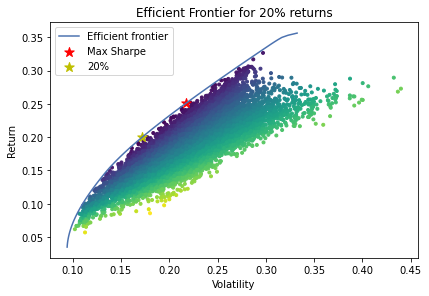

<Figure size 2160x1440 with 0 Axes>

In [204]:
myPortfolio.showEfficientFrontier()

In [205]:
class Portfolio:

    def __init__(self, tickerString: str, expectedReturn: float, portfolioName: str, riskBucket: int):

        self.name = portfolioName
        self.riskBucket = riskBucket
        self.expectedReturn = expectedReturn
        self.allocations = []

        from pypfopt.efficient_frontier import EfficientFrontier
        from pypfopt import risk_models
        from pypfopt import expected_returns
    
        df = self.__getDailyPrices(tickerString, "20y")

        self.mu = expected_returns.mean_historical_return(df)
        self.S = risk_models.sample_cov(df)

        ef = EfficientFrontier(self.mu, self.S)

        ef.efficient_return(expectedReturn)
        self.expectedRisk = ef.portfolio_performance()[1]
        portfolioWeights = ef.clean_weights()

        for key, value in portfolioWeights.items():
            newAllocation = Allocation(key, value)
            self.allocations.append(newAllocation)

    def __getDailyPrices(self, tickerStringList, period):
        data = yf.download(tickerStringList, group_by="Ticker", period=period)
        data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
        data = data.dropna()
        data.columns = data.columns.droplevel(1)
        return data

    def printPortfolio(self):
        print("Portfolio Name: " + self.name)
        print("Risk Bucket: " + str(self.riskBucket))
        print("Expected Return: " + str(self.expectedReturn))
        print("Expected Risk: " + str(self.expectedRisk))
        print("Allocations: ")
        for allocation in self.allocations:
            print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

    def showEfficientFrontier(self):
        import copy
        import numpy as np
        ef = EfficientFrontier(self.mu, self.S)
        fig, ax = pyplot.subplots()
        #ef_max_sharpe = copy.deepcopy(ef)
        ef_max_sharpe = EfficientFrontier(self.mu, self.S)
        #ef_return = copy.deepcopy(ef)
        ef_return = EfficientFrontier(self.mu, self.S)
        plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

        # Generate random portfolios
        n_samples = 10000
        w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
        rets = w.dot(ef.expected_returns)
        stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
        sharpes = rets / stds
        ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

        # Find the tangency portfolio
        ef_max_sharpe.max_sharpe()
        ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
        ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

        # Find the return portfolio
        ef_return.efficient_return(self.expectedReturn)
        ret_tangent2, std_tangent2, _ = ef_return.portfolio_performance()
        returnP = str(int(self.expectedReturn*100))+"%"
        ax.scatter(std_tangent2, ret_tangent2, marker="*", s=100, c="y", label=returnP)

        # Output
        ax.set_title("Efficient Frontier for " + returnP + " returns")
        ax.legend()
        pyplot.figure(figsize=(30,20))
        pyplot.tight_layout()
        pyplot.show()
        
    def showEfficientFrontier(self):
        names = price_data.columns
# visualize the minimum variance portfolio.
min_var = pd.Series(allocation.percentage, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

NameError: name 'allocation' is not defined